## Arshita Aashtha

# Task 1 - Prediction using Supervised ML

#### In this task we have the data of student with their number of hours they studied and the score they secured.The data can be found with link : http://bit.ly/w-data

#### In this regression task we have to predict the predict the percentage of an student based on the number of study hours and what will be predicted score if a student studies for 9.25 hrs/ day.

### Importing Libraries

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Data

In [3]:
# Reading data from link
link="http://bit.ly/w-data"
s_data=pd.read_csv(link)
print("Data Imported Successfully")
s_data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Describing Data
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Checking Null values
s_data.isna().sum()

Hours     0
Scores    0
dtype: int64

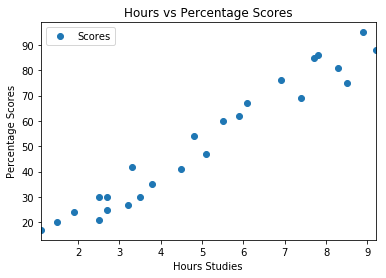

In [6]:
# Plotting graph of distribution
s_data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage Scores')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Scores')
plt.show()

##### From the above graph it is clear that there is a positive linear relation between the number of hours studied and percentage of score i.e 'Hours is directly proportional to Score'.

### Preparing Data

In [7]:
#Dividing data into attributes and labels
x=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values

In [8]:
#spliting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

### Training Algorithm 

In [9]:
# training our model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training Complete")

Training Complete


### Visualizing Linear Regression

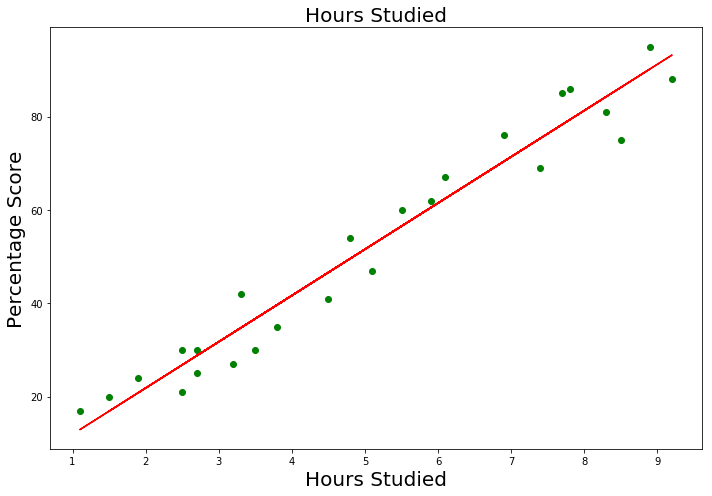

In [11]:
#visualising linear regression
line=regressor.coef_*x+regressor.intercept_
#plotting for the test data
plt.figure(figsize=(10,7))
plt.scatter(x,y,color="green")
plt.plot(x,line,color="r")
plt.title('Hours Studied',fontsize=20)
plt.xlabel('Hours Studied',fontsize=20)
plt.ylabel('Percentage Score',fontsize=20)
plt.tight_layout()
plt.show()

In [13]:
#retriving intercept
print("intercept is:" )
print(regressor.intercept_)

intercept is:
2.018160041434683


In [14]:
# retriving coefficient
print("coefficient is:")
print(regressor.coef_)

coefficient is:
[9.91065648]


### Making Prediction

In [15]:
#training model
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
#comparing Actual vs Predicted
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 1.0, 'Actual vs Predicted Score')

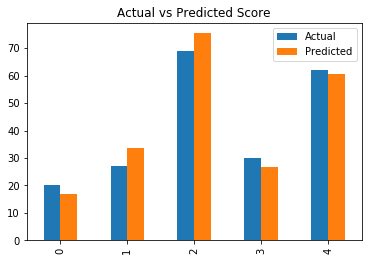

In [19]:
# Plotting Actual vs Predicted
df.plot(kind='bar')
plt.title('Actual vs Predicted Score')

### Predicting score if a student studies for 9.25 hrs/ day


In [21]:
#testing with our own data 
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating the Algorithm

In [23]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 4.183859899002975
Mean squared error: 21.5987693072174
Root Mean Square error: 4.6474476121003665
